In [1]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 87570, done.
remote: Counting objects: 100% (1324/1324), done.
remote: Compressing objects: 100% (615/615), done.
remote: Total 87570 (delta 809), reused 1178 (delta 696), pack-reused 86246
Receiving objects: 100% (87570/87570), 599.34 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (62691/62691), done.


In [2]:
!cd /content/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .


Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

--2023-09-16 00:56:40--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.4.207, 172.253.118.207, 74.125.200.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.4.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20518283 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.57M  49.7MB/s    in 0.4s    

2023-09-16 00:56:42 (49.7 MB/s) - ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’ saved [20518283/20518283]



In [ ]:
!mkdir ./ssd

In [ ]:
!tar -xvf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz -C ./ssd

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/sadly --pipeline_config_path=/content/models/community/pipeline.config --num_train_steps=2000

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/sadly --pipeline_config_path=/content/models/community/pipeline.config --checkpoint_dir=/content/sadly

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=/content/models/community/pipeline.config --trained_checkpoint_dir=/content/sadly --output_directory=/content/models/community/model

In [5]:
!tar xzf ./model.tar.gz

In [ ]:
!tar -czf model.tar.gz /content/models/community/model

tar: Removing leading `/' from member names


In [8]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [9]:
configs = config_util.get_configs_from_pipeline_file('/content/model/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('/content/model/checkpoint/', 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

Try to detect

In [13]:
!git clone https://github.com/getStRiCtd/hack2023urban

Cloning into 'hack2023urban'...
remote: Enumerating objects: 503, done.
remote: Total 503 (delta 0), reused 0 (delta 0), pack-reused 503
Receiving objects: 100% (503/503), 237.99 MiB | 15.11 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (482/482), done.


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

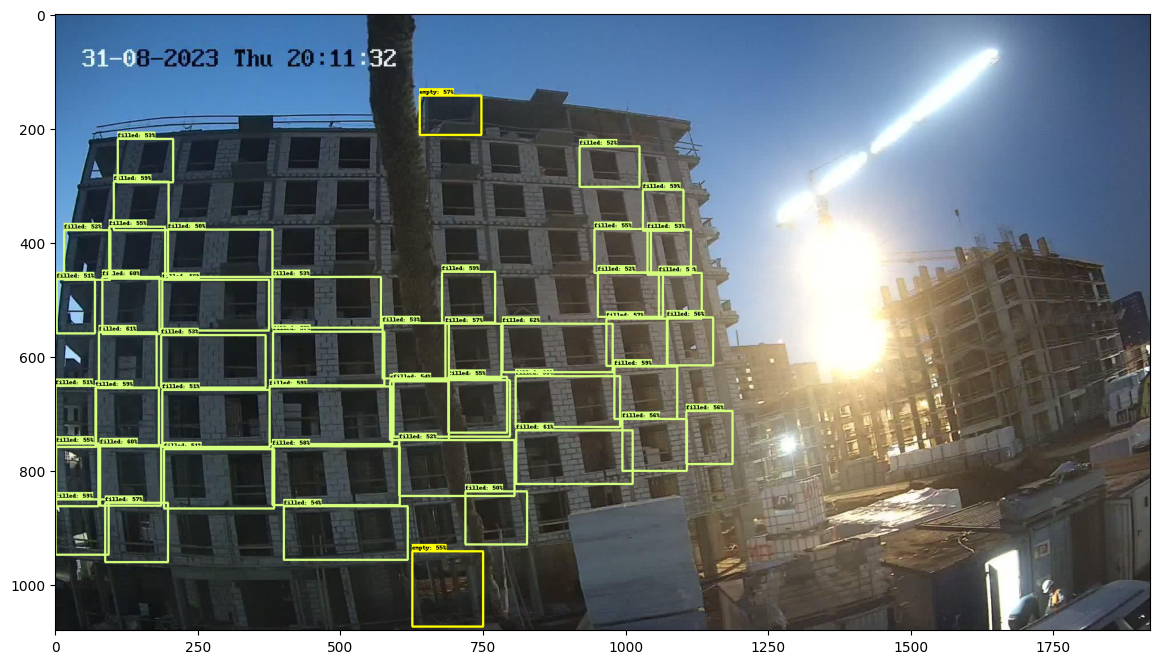

In [49]:
IMAGE_PATH = os.path.join('/content/hack2023urban/DATA_TRAIN/images/0000002860building.jpg')
IMAGE_PATH_TEST = ('/content/hack2023urban/DATA_TEST/38_14_12_06_790792-2023-08-31_34370.jpg')
category_index = label_map_util.create_category_index_from_labelmap('/content/model/label_map.pbtxt')

img = cv2.imread(IMAGE_PATH_TEST)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

detections = detect_fn(input_tensor)


num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=1000,
            min_score_thresh=.5,
            agnostic_mode=False)

fig, ax = plt.subplots(1,1, figsize=(16,8))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
# plt.imsave("2.jpg", image_np_with_detections)
